### Infos

https://larevueia.fr/introduction-au-nlp-avec-python-les-ia-prennent-la-parole/
https://www.projectpro.io/article/how-to-build-an-nlp-model-step-by-step-using-python/915

In [34]:
!pip install gensim nltk scikit-learn seaborn tensorflow setuptools

In [35]:
import nltk
import numpy as np 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from nltk import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from collections import Counter
from string import punctuation
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import layers, models, Input
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /home/brand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/brand/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
data = pd.read_csv('data/scrapped/sentences.csv')
sentences = data['sentence'].values
print(data.head())

   sentenceID                        sentence       label departure  \
0           1  Réserver un billet pour Nantes  TRIP_ORDER       NaN   
1           2   Aller à Lyon pour une réunion  TRIP_ORDER       NaN   
2           3              This is not French  NOT_FRENCH       NaN   
3           4    Réserver un hôtel à Bordeaux    NOT_TRIP       NaN   
4           5          Visiter la Tour Eiffel  TRIP_ORDER       NaN   

  destination  
0      Nantes  
1        Lyon  
2         NaN  
3         NaN  
4       Paris  


<Axes: >

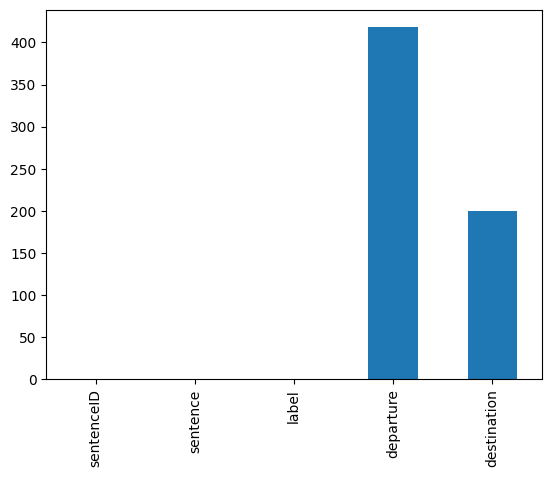

In [37]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.isnull().sum().plot(kind='bar')

/tmp/ipykernel_10915/1523860694.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[plot_cols[i]], label='train', color=color[1]).set_title(plot_titles[i])
/tmp/ipykernel_10915/1523860694.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[plot_cols[i]], label='test', color=color[0]

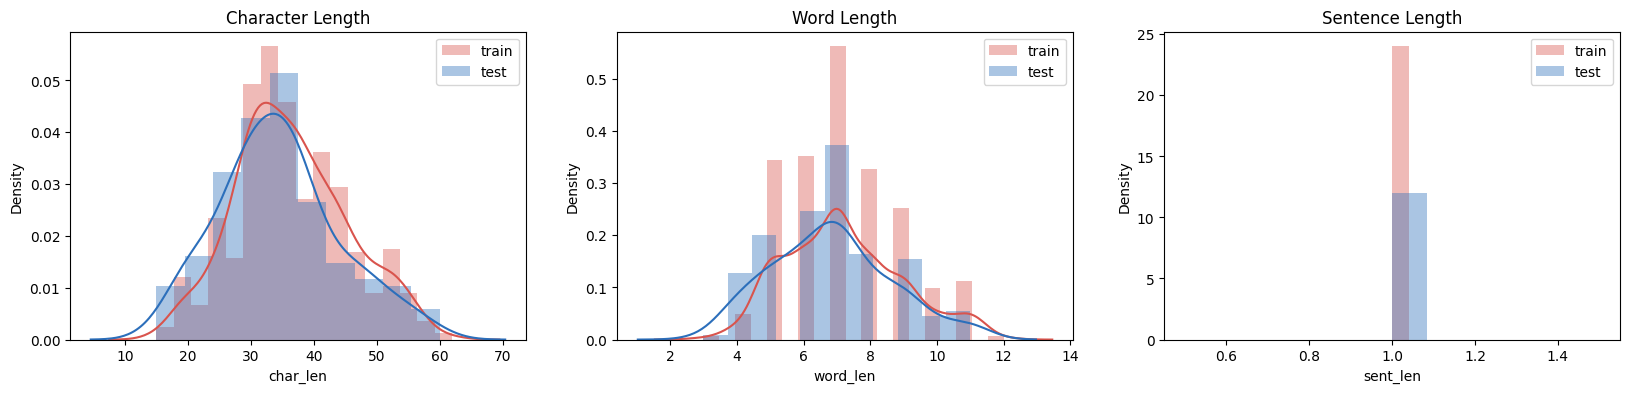

In [38]:
color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]
# count number of characters in each setence
train['char_len'] = train["sentence"].str.len()
test['char_len'] = test["sentence"].str.len()

# count number of words in each sentence
train['word_len'] = [len(word_tokenize(sentence)) for sentence in train["sentence"]]
test['word_len'] = [len(word_tokenize(sentence)) for sentence in test["sentence"]]

# count number of sentence in each sentence
train['sent_len'] = [len(sent_tokenize(sentence)) for sentence in train["sentence"]]
test['sent_len'] = [len(sent_tokenize(sentence)) for sentence in test["sentence"]]

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(train[plot_cols[i]], label='train', color=color[1]).set_title(plot_titles[i])
    sns.distplot(test[plot_cols[i]], label='test', color=color[0])
    plt.legend()

Text(0.5, 1.0, 'Top Stopwords')

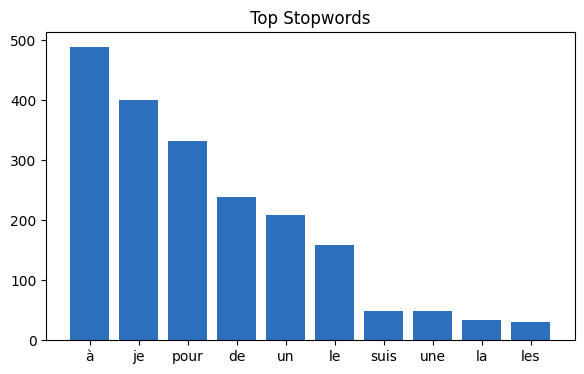

In [39]:
stop = set(stopwords.words('french'))
corpus0 = [] 
[corpus0.append(word.lower()) for sentence in train["sentence"] for word in word_tokenize(sentence)]


# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'vais'),
  Text(1, 0, 'aller'),
  Text(2, 0, 'veux'),
  Text(3, 0, 'lyon'),
  Text(4, 0, 'pars'),
  Text(5, 0, 'nice'),
  Text(6, 0, 'marseille'),
  Text(7, 0, 'train'),
  Text(8, 0, 'bordeaux'),
  Text(9, 0, 'lille')])

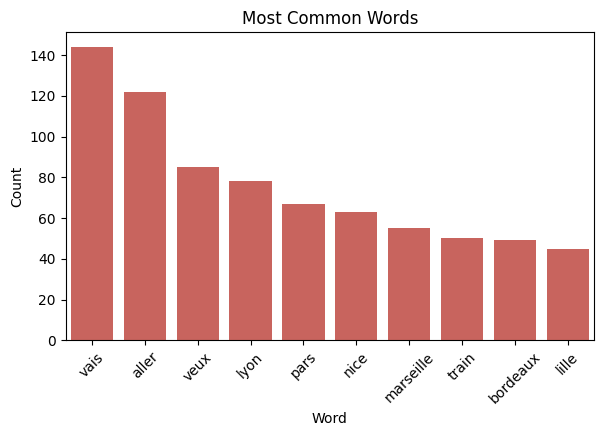

In [40]:
corpus0 = []
[corpus0.append(word.lower()) for sentence in train["sentence"] for word in word_tokenize(sentence)]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords


# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])


plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top Punctuations')

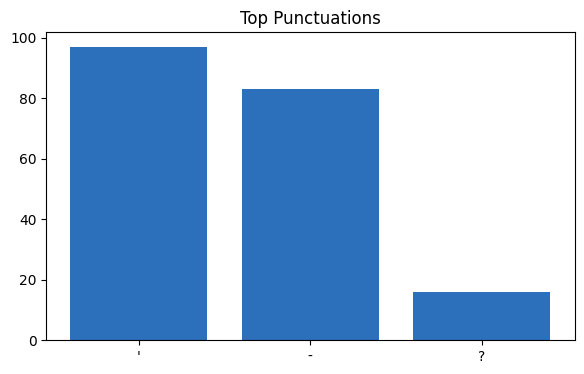

In [41]:
corpus0 = [] 
[corpus0.append(c) for sentence in train["sentence"] for c in sentence]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations


from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations')


([0, 1, 2],
 [Text(0, 0, 'trip_order'), Text(1, 0, 'not_trip'), Text(2, 0, 'not_french')])

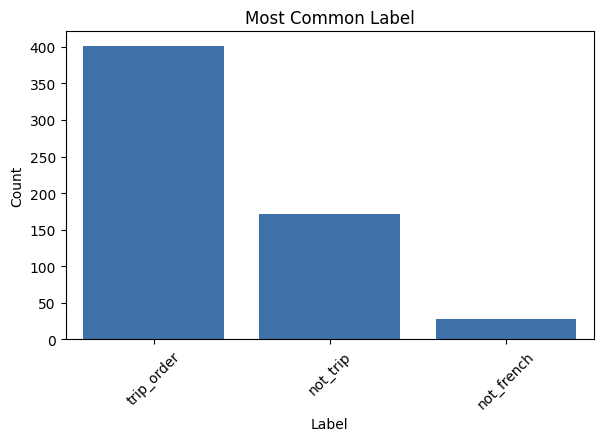

In [42]:
corpus0 = []
[corpus0.append(word.lower()) for label in train["label"] for word in word_tokenize(label)]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords


# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Label','Count'])


plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Label',y='Count',data=df0.head(10), color=color[0]).set_title('Most Common Label')
plt.xticks(rotation=45)

In [43]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['sentence'])
sequences = tokenizer.texts_to_sequences(data['sentence'])
padded_sequences = pad_sequences(sequences, padding='post')


In [44]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['label'])
X_trainLabel, X_testLabel, y_trainLabel, y_testLabel = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
sentenceComparator = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=padded_sequences.shape[1]),
    layers.LSTM(48),
    layers.Dense(48, activation='relu'), 
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Nombre de classes
])

sentenceComparator.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = sentenceComparator.fit(X_trainLabel, y_trainLabel, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
15/15 [==============================] - 2s 41ms/step - loss: 1.0142 - accuracy: 0.6354 - val_loss: 0.8897 - val_accuracy: 0.6612
Epoch 2/10
15/15 [==============================] - 0s 11ms/step - loss: 0.7324 - accuracy: 0.6687 - val_loss: 0.6311 - val_accuracy: 0.6612
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 0.3664 - accuracy: 0.8250 - val_loss: 0.2777 - val_accuracy: 0.9256
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 0.1722 - accuracy: 0.9417 - val_loss: 0.1717 - val_accuracy: 0.9339
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0961 - accuracy: 0.9604 - val_loss: 0.1221 - val_accuracy: 0.9752
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9875 - val_loss: 0.2202 - val_accuracy: 0.9587
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0400 - accuracy: 0.9896 - val_loss: 0.0981 - val_accuracy: 0.9835
Epoch 8/10
15/15 [

5/5 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.9470
Test Accuracy: 0.95


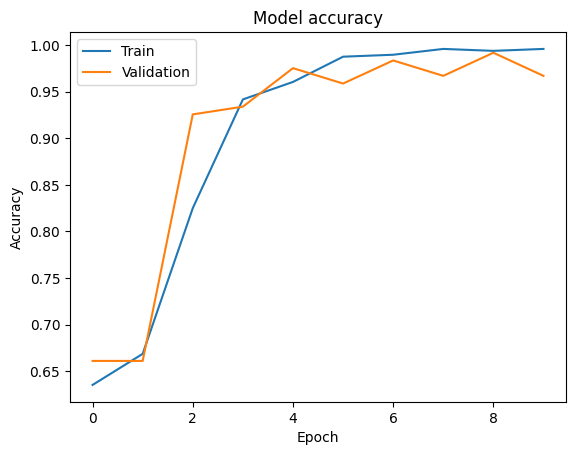

In [45]:
loss, accuracy = sentenceComparator.evaluate(X_testLabel, y_testLabel)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
def label_sentence(modelParam, tokenizer, label_encoder, sentence):
    # Prétraitement de la phrase
    sentence = sentence.lower()  # Mise en minuscules
    sequence = tokenizer.texts_to_sequences([sentence])  # Tokenisation
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=padded_sequences.shape[1])  # Padding

    # Prédiction
    prediction = modelParam.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([prediction.argmax(axis=1)[0]])  # Convertir l'index en label
    return predicted_label[0]


In [47]:
df = data[data['label'] == 'TRIP_ORDER']

# Tokenisation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentence'])
sequences = tokenizer.texts_to_sequences(df['sentence'])

# Padding des séquences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encodage des villes
departure_encoder = LabelEncoder()
destination_encoder = LabelEncoder()
df['departure'] = departure_encoder.fit_transform(df['departure'].fillna(''))  # Remplacer NaN par une chaîne vide
df['destination'] = destination_encoder.fit_transform(df['destination'])

# Création des entrées et sorties
X = padded_sequences
y_departure = df['departure'].values
y_destination = df['destination'].values
X_train, X_test, y_train_departure, y_test_departure, y_train_destination, y_test_destination = train_test_split(
    X, y_departure, y_destination, test_size=0.2, random_state=42
)

/tmp/ipykernel_10915/3256915273.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure'] = departure_encoder.fit_transform(df['departure'].fillna(''))  # Remplacer NaN par une chaîne vide
/tmp/ipykernel_10915/3256915273.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination'] = destination_encoder.fit_transform(df['destination'])


In [48]:
# Définir l'entrée
input_layer = Input(shape=(max_length,))

# Embedding + LSTM
embedding_layer = layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length)(input_layer)
lstm_layer = layers.LSTM(32)(embedding_layer)
dense_layer = layers.Dense(16, activation='relu')(lstm_layer)
dropout_layer = layers.Dropout(0.5)(dense_layer) 

# Deux couches de sortie pour les prédictions de départ et de destination
departure_output = layers.Dense(len(departure_encoder.classes_), activation='softmax', name='departure_output')(dense_layer)
destination_output = layers.Dense(len(destination_encoder.classes_), activation='softmax', name='destination_output')(dense_layer)

# Modèle avec deux sorties
model = models.Model(inputs=input_layer, outputs=[departure_output, destination_output])

# Compilation
model.compile(optimizer='adam', 
              loss={'departure_output': 'sparse_categorical_crossentropy', 
                    'destination_output': 'sparse_categorical_crossentropy'},
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, 
                    {'departure_output': y_train_departure, 'destination_output': y_train_destination}, 
                    epochs=20, 
                    batch_size=2)


Epoch 1/20
192/192 [==============================] - 4s 7ms/step - loss: 6.1649 - departure_output_loss: 2.4307 - destination_output_loss: 3.7342 - departure_output_accuracy: 0.5365 - destination_output_accuracy: 0.0443
Epoch 2/20
192/192 [==============================] - 1s 6ms/step - loss: 4.9883 - departure_output_loss: 1.6159 - destination_output_loss: 3.3724 - departure_output_accuracy: 0.5625 - destination_output_accuracy: 0.1016
Epoch 3/20
192/192 [==============================] - 1s 5ms/step - loss: 4.6233 - departure_output_loss: 1.4187 - destination_output_loss: 3.2046 - departure_output_accuracy: 0.5859 - destination_output_accuracy: 0.1198
Epoch 4/20
192/192 [==============================] - 1s 4ms/step - loss: 4.3866 - departure_output_loss: 1.3590 - destination_output_loss: 3.0277 - departure_output_accuracy: 0.5964 - destination_output_accuracy: 0.1458
Epoch 5/20
192/192 [==============================] - 1s 5ms/step - loss: 4.0639 - departure_output_loss: 1.3165 - d

In [49]:
# Prédictions sur les données de test
departure_pred, destination_pred = model.predict(X_test)

# Obtenir les classes prédites (l'indice de la classe avec la probabilité la plus élevée)
departure_pred_labels = departure_pred.argmax(axis=1)
destination_pred_labels = destination_pred.argmax(axis=1)

# Calcul de l'exactitude pour chaque sortie
departure_accuracy = accuracy_score(y_test_departure, departure_pred_labels)
destination_accuracy = accuracy_score(y_test_destination, destination_pred_labels)

print(f"Exactitude pour les villes de départ : {departure_accuracy:.2f}")
print(f"Exactitude pour les villes de destination : {destination_accuracy:.2f}")

3/3 [==============================] - 0s 7ms/step
Exactitude pour les villes de départ : 0.72
Exactitude pour les villes de destination : 0.77


In [50]:
def label_trip_order(model, tokenizer, departure_encoder, destination_encoder, sentence, max_length):
    # Prétraitement de la phrase
    sentence = sentence.lower()  # Mise en minuscules
    sequence = tokenizer.texts_to_sequences([sentence])  # Tokenisation
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=max_length)  # Padding

    # Prédiction
    departure_pred, destination_pred = model.predict(padded_sequence)
    
    # Décodage des prédictions
    predicted_departure = departure_encoder.inverse_transform([departure_pred.argmax(axis=1)[0]])
    predicted_destination = destination_encoder.inverse_transform([destination_pred.argmax(axis=1)[0]])
    
    return {
        'departure': predicted_departure[0] if predicted_departure[0] else "Aucun départ identifié",
        'destination': predicted_destination[0] if predicted_destination[0] else "Aucune destination identifiée"
    }

In [51]:
phrasesTest =[
    "quel est le chemin le plus court pour aller de lyon a paris", #TRIP
    "t'y est fada le sang", #NOT_TRIP
    "are you sure ?", #NOT_FRENCH
    "j'aime l'air polué de Paris", #NOT_TRIP
    "je veux aller à Antibes", #TRIP
    "je veux aller à Voiron", #TRIP
    "comment aller à Rennes ?", #TRIP
    "tu est revenue de Paris", #NOT_TRIP
    "Je suis à Nantes et j'aimerais aller Montaigu", #TRIP
]

In [52]:
for phrase in phrasesTest:
    label = label_sentence(sentenceComparator, tokenizer, label_encoder, phrase)
    if label=='TRIP_ORDER':
        result = label_trip_order(model, tokenizer, departure_encoder, destination_encoder, phrase, max_length)
        print(label,": ",result)
        print("la phrase est :",phrase)
    else:
        print(label)

1/1 [==============================] - 0s 388ms/step
TRIP_ORDER :  {'departure': 'Aucun départ identifié', 'destination': 'Paris'}
la phrase est : quel est le chemin le plus court pour aller de lyon a paris
1/1 [==============================] - 0s 25ms/step
NOT_TRIP
1/1 [==============================] - 0s 19ms/step
NOT_TRIP
1/1 [==============================] - 0s 21ms/step
NOT_TRIP
1/1 [==============================] - 0s 18ms/step
TRIP_ORDER :  {'departure': 'Aucun départ identifié', 'destination': 'Angers'}
la phrase est : je veux aller à Antibes
1/1 [==============================] - 0s 17ms/step
TRIP_ORDER :  {'departure': 'Aucun départ identifié', 'destination': 'Montpellier'}
la phrase est : je veux aller à Voiron
1/1 [==============================] - 0s 20ms/step
TRIP_ORDER :  {'departure': 'Aucun départ identifié', 'destination': 'Rennes'}
la phrase est : comment aller à Rennes ?
1/1 [==============================] - 0s 18ms/step
NOT_TRIP
1/1 [==========================